In [1]:
using IntervalConstraintProgramming, ValidatedNumerics

In [2]:
disc = @constraint x^2 + y^2 <= 1

code = quote 
    z1 = x ^ 2
    z2 = y ^ 2
    z3 = z1 + z2
    z3 = z3 ∩ _A_
    (z3,z1,z2) = plusRev(z3,z1,z2)
    (z2,y,_) = powerRev(z2,y,2)
    (z1,x,_) = powerRev(z1,x,2)
    return (x,y)
end


Separator with variables x, y

In [3]:
X = IntervalBox(-∞..∞, -∞..∞)

[-∞, ∞] × [-∞, ∞]

In [4]:
disc(X)

(([-1, 1],[-1, 1]),([-∞, ∞],[-∞, ∞]))

In [18]:
@time P = setinverse(disc, X, 1e-2);

  0.358591 seconds (2.13 M allocations: 69.906 MB, 36.71% gc time)


In [14]:
length(P.inner)

7164

In [6]:
typeof(P)

IntervalConstraintProgramming.Paving{2,Float64}

In [9]:
Vol(P)

2-dimensional area: [3.1407, 3.14248]

In [11]:
include("draw_boxes.jl")

/Users/dpsanders/.julia/v0.4/Conda/deps/usr/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


draw (generic function with 13 methods)

In [23]:
pygui(false)

false

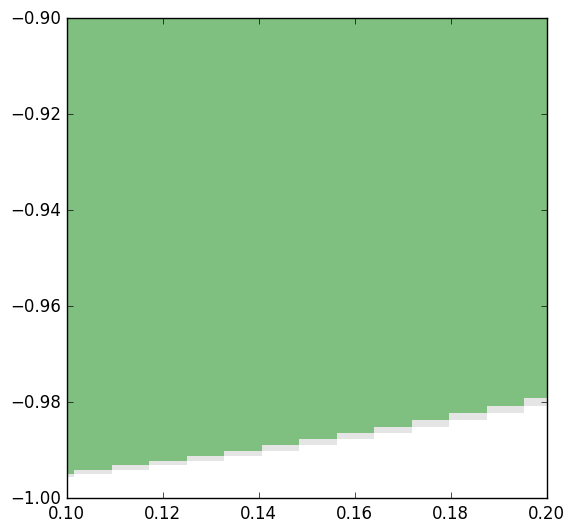

4-element Array{Float64,1}:
  0.1
  0.2
 -1.0
 -0.9

In [25]:
draw(P)
axis([0.1,0.2,-1,-0.9])